In [1]:
from google.colab import files
upload = files.upload()

Saving zomato.csv to zomato.csv
Saving Country-Code.xlsx to Country-Code.xlsx


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [4]:
df_zomato = pd.read_csv('zomato.csv', encoding = 'latin-1')
df_code = pd.read_excel('Country-Code.xlsx')

In [5]:
df_zomato.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [6]:
df_zomato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [7]:
df_zomato.drop('Restaurant ID', axis = 1, inplace = True)

In [8]:
df_zomato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant Name       9551 non-null   object 
 1   Country Code          9551 non-null   int64  
 2   City                  9551 non-null   object 
 3   Address               9551 non-null   object 
 4   Locality              9551 non-null   object 
 5   Locality Verbose      9551 non-null   object 
 6   Longitude             9551 non-null   float64
 7   Latitude              9551 non-null   float64
 8   Cuisines              9542 non-null   object 
 9   Average Cost for two  9551 non-null   int64  
 10  Currency              9551 non-null   object 
 11  Has Table booking     9551 non-null   object 
 12  Has Online delivery   9551 non-null   object 
 13  Is delivering now     9551 non-null   object 
 14  Switch to order menu  9551 non-null   object 
 15  Price range          

In [9]:
df_final = pd.merge(df_zomato, df_code, on = 'Country Code', how = 'left')

In [11]:
df_final.head()

,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [12]:
df_final.isnull().sum()

Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

In [13]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant Name       9551 non-null   object 
 1   Country Code          9551 non-null   int64  
 2   City                  9551 non-null   object 
 3   Address               9551 non-null   object 
 4   Locality              9551 non-null   object 
 5   Locality Verbose      9551 non-null   object 
 6   Longitude             9551 non-null   float64
 7   Latitude              9551 non-null   float64
 8   Cuisines              9542 non-null   object 
 9   Average Cost for two  9551 non-null   int64  
 10  Currency              9551 non-null   object 
 11  Has Table booking     9551 non-null   object 
 12  Has Online delivery   9551 non-null   object 
 13  Is delivering now     9551 non-null   object 
 14  Switch to order menu  9551 non-null   object 
 15  Price range          

In [14]:
cat_col = []
for x in df_final.dtypes.index:
  if df_final.dtypes[x] == 'object':
    cat_col.append(x)
cat_col

['Restaurant Name',
 'City',
 'Address',
 'Locality',
 'Locality Verbose',
 'Cuisines',
 'Currency',
 'Has Table booking',
 'Has Online delivery',
 'Is delivering now',
 'Switch to order menu',
 'Rating color',
 'Rating text',
 'Country']

In [15]:
num_col = []
for x in df_final.dtypes.index:
  if df_final.dtypes[x] != 'object':
    num_col.append(x)
num_col

['Country Code',
 'Longitude',
 'Latitude',
 'Average Cost for two',
 'Price range',
 'Aggregate rating',
 'Votes']

In [16]:
df_final['Country'].value_counts()

Country
India             8652
United States      434
United Kingdom      80
Brazil              60
UAE                 60
South Africa        60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Singapore           20
Qatar               20
Sri Lanka           20
Canada               4
Name: count, dtype: int64

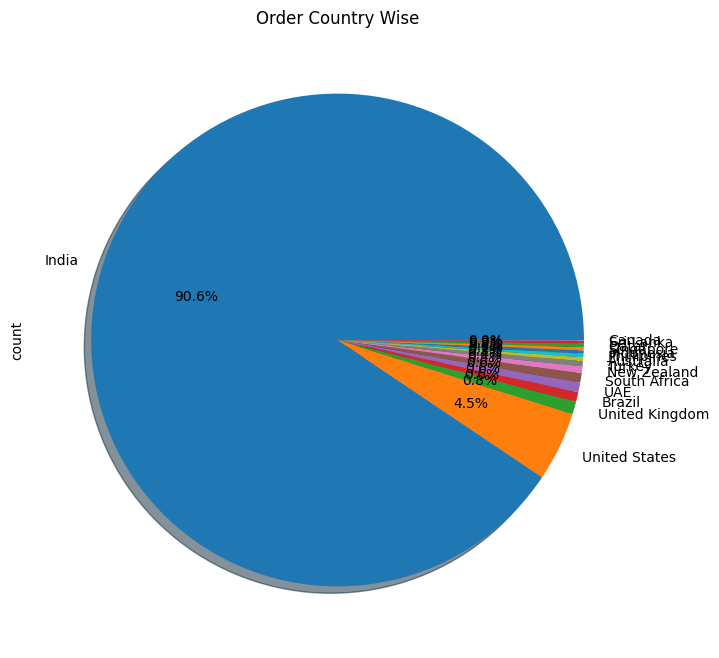

In [21]:
df_final['Country'].value_counts().plot.pie(autopct = '%1.1f%%', figsize = (8,8), shadow = True)
plt.title("Order Country Wise")
plt.show()

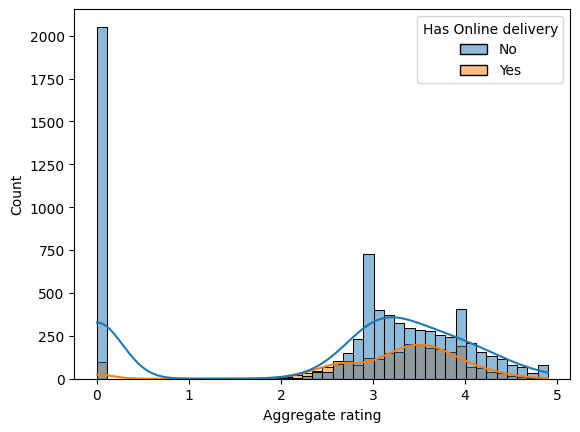

In [20]:
sns.histplot(x = 'Aggregate rating', data = df_final, hue = 'Has Online delivery',kde = True )
plt.show()

In [23]:
ratings_df = df_final.groupby(['Aggregate rating', 'Rating color', 'Rating text']).size().reset_index().rename(columns = {0: 'Rating Count'})
ratings_df = ratings_df.sort_values(by = 'Aggregate rating')
ratings_df

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


In [25]:
df_final.groupby(['Country','Has Online delivery'])['Aggregate rating'].mean().reset_index().sort_values('Aggregate rating')

,Country,Has Online delivery,Aggregate rating
3,India,No,2.244999
4,India,Yes,3.238836
2,Canada,No,3.575000
9,Singapore,No,3.575000
0,Australia,No,3.658333
1,Brazil,No,3.763333
11,Sri Lanka,No,3.870000
16,United States,No,4.004378
8,Qatar,No,4.060000
15,United Kingdom,No,4.087500


In [ ]:
plot(kind='bar',x='Country',y='Aggregate rating',color='c')

<Axes: xlabel='Country'>

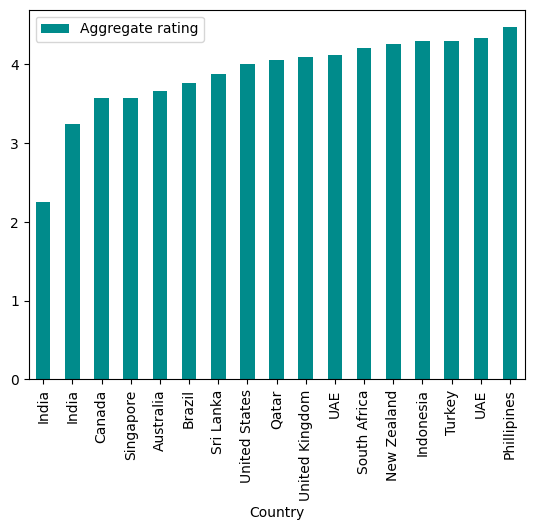

In [27]:
df_final.groupby(['Country','Has Online delivery'])['Aggregate rating'].mean().reset_index().sort_values('Aggregate rating').plot(kind='bar',x='Country',y='Aggregate rating',color='darkcyan')

In [28]:
df_final.columns

Index(['Restaurant Name', 'Country Code', 'City', 'Address', 'Locality',
       'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [29]:
# has online delivery
# has table delivery

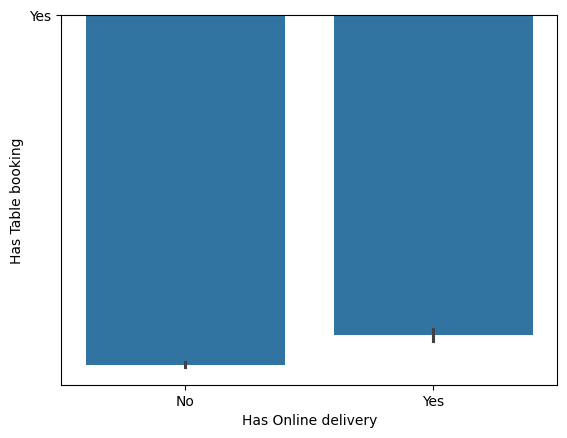

In [32]:
sns.barplot(x='Has Online delivery', y = 'Has Table booking', data = df_final)
plt.show()

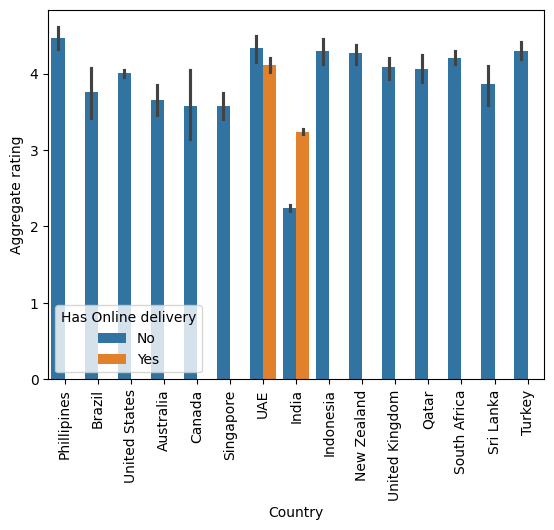

In [34]:
sns.barplot(x='Country', y = 'Aggregate rating', hue = 'Has Online delivery', data = df_final)
plt.xticks(rotation = 90)
plt.show()

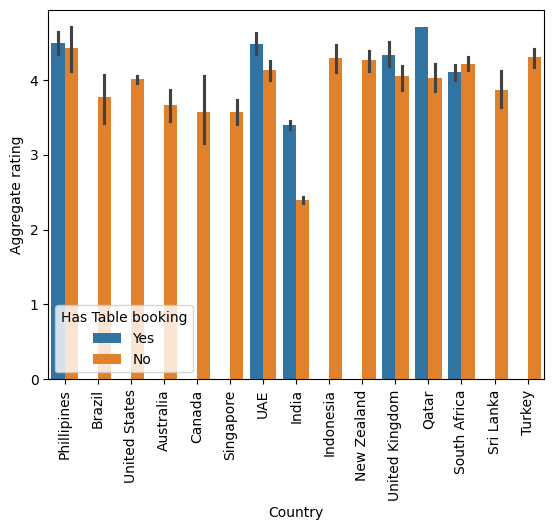

In [35]:
sns.barplot(x='Country', y = 'Aggregate rating', hue = 'Has Table booking', data = df_final)
plt.xticks(rotation = 90)
plt.show()

In [36]:
df_final.columns

Index(['Restaurant Name', 'Country Code', 'City', 'Address', 'Locality',
       'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [40]:
corr = df_final.corr(numeric_only = True)

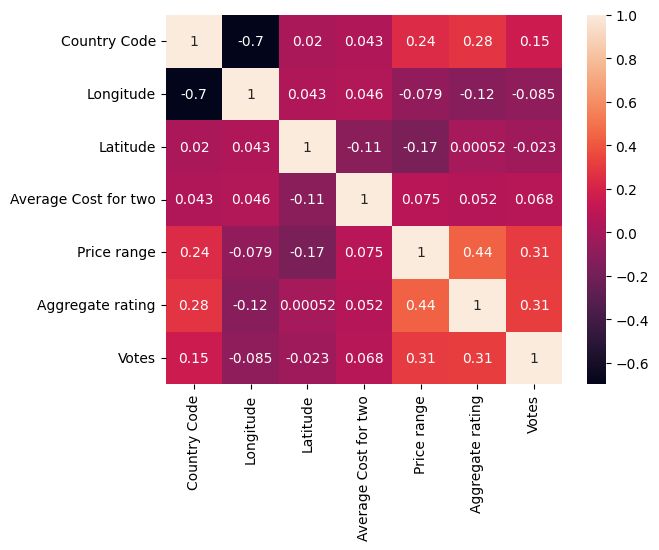

<Figure size 1000x1000 with 0 Axes>

In [42]:
sns.heatmap(corr, annot = True)
plt.figure(figsize = (10,10))
plt.show()

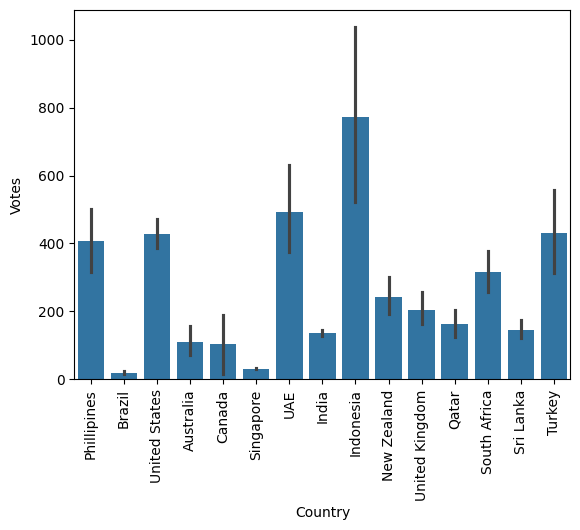

In [43]:
sns.barplot(x='Country', y = 'Votes', data = df_final)
plt.xticks(rotation = 90)
plt.show()

In [44]:
df_final['Price range'].unique()

array([3, 4, 2, 1])

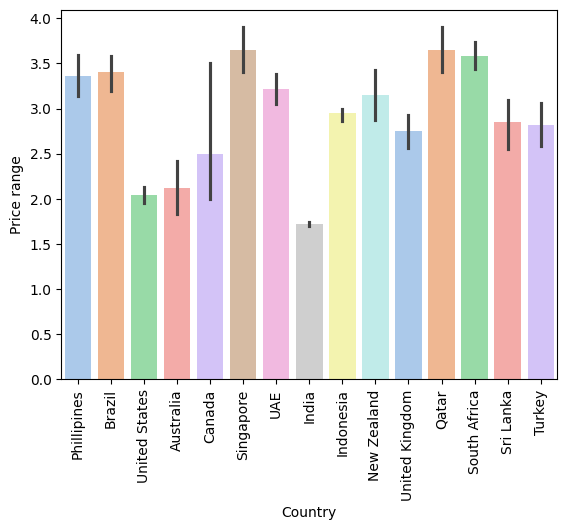

In [46]:
sns.barplot(x = 'Country', y = 'Price range', data = df_final, palette = sns.color_palette('pastel'))
plt.xticks(rotation = 90)
plt.show()

In [47]:
num_col

['Country Code',
 'Longitude',
 'Latitude',
 'Average Cost for two',
 'Price range',
 'Aggregate rating',
 'Votes']

In [55]:
px.scatter_3d(df_final, x = 'Aggregate rating', y = 'Price range', z = 'Votes', color = 'Country')